In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 

plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

In [2]:
def p2f(x):
    return float(x.strip('%'))/100

In [3]:
df = pd.read_csv('period_test.ratio.csv', sep=',', converters={'c_packet_rate':p2f})

In [4]:
df2 = pd.read_csv('fb_mode2_1.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df2['mode'] = 'BF2'

In [5]:
df3 = pd.read_csv('pascal.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df3['mode'] = 'PASCAL'

In [6]:
df4 = pd.read_csv('cad_success1.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df5 = pd.read_csv('cad_success3.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df4['mode'] = 'cad_success_1'
df5['mode'] = 'cad_success_3'

In [7]:
df6 = pd.read_csv('fb_limit2.ratio.csv', sep=',', converters={'c_packet_rate':p2f})
df6['mode'] = 'limit'

In [8]:
df_agg = pd.read_csv('fb_agg.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df_agg['mode'] = 'agg'
df_append = pd.read_csv('fb_append.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df_append['mode'] = 'append'

In [9]:
df_append2 = pd.read_csv('fb_append_test.ratio.csv', sep=',', converters={'c_packet_rate': p2f})
df_append2['mode'] = 'append2'

In [10]:
df_append

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
0   append    100     800        0.98765                         437   
1   append    400     800        0.96498                        1799   
2   append    200     800        0.96444                         882   
3   append    500     800        0.96709                        2175   
4   append    300     800        0.97034                        1318   
..     ...    ...     ...            ...                         ...   
85  append    100     400        0.97455                         894   
86  append    400     400        0.97393                        3541   
87  append    200     400        0.95397                        1771   
88  append    500     400        0.93310                        4453   
89  append    300     400        0.95703                        2788   

    c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
0                       111                    325                      1   
1                      1279                    514                      6   
2                       429                    451                      2   
3                      1619                    547                      9   
4                       838                    472                      8   
..                      ...                    ...                    ...   
85                      499                    393                      2   
86                     2983                    538                     20   
87                     1279                    479                     13   
88                     3844                    583                     26   
89                     2263                    512                     13   

    agg_packets  
0             1  
1             6  
2             2  
3             9  
4             8  
..          ...  
85            2  
86           20  
87           13  
88           26  
89           13  

[90 rows x 9 columns]

In [11]:
df = pd.concat([df, df2, df3, df4, df5, df6, df_agg, df_append, df_append2], axis=0, sort=False)

In [12]:
df = df.sort_values(['mode', 'period', 'nodes'])

In [13]:
df['c_sensor_buffer_packet_rate'] = df['c_sensor_buffer_packets'] / df['nodes']
df['c_sensor_drop_packet_rate'] = df['c_sensor_drop_packets'] / df['nodes']

In [14]:
df['c_sensor_success_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['nodes']

In [15]:
df['c_sensor_success_padding_packet_rate'] = df['c_packet_rate'] * df['c_sensor_send_success'] / df['c_sensor_want_send_packets']

In [16]:

df['avg_agg_packets'] = df['agg_packets'] / df['period']

In [17]:
sector = df.groupby('mode')

In [18]:
sector.get_group('cad_success_1')

mode  nodes  period  c_packet_rate  c_sensor_want_send_packets  \
80  cad_success_1    100   100.0        0.94822                        3447   
82  cad_success_1    200   100.0        0.90159                        7115   
84  cad_success_1    300   100.0        0.87551                       10859   
81  cad_success_1    400   100.0        0.88291                       14198   
83  cad_success_1    500   100.0        0.86277                       18040   
..            ...    ...     ...            ...                         ...   
35  cad_success_1    100   950.0        0.97312                         396   
37  cad_success_1    200   950.0        0.95929                         797   
39  cad_success_1    300   950.0        0.93114                        1120   
36  cad_success_1    400   950.0        0.89316                        1507   
38  cad_success_1    500   950.0        0.88842                        1811   

    c_sensor_buffer_packets  c_sensor_send_success  c_sensor_drop_packets  \
80                     2829                    618                      0   
82                     6423                    692                      0   
84                    10119                    740                      0   
81                    13455                    743                      0   
83                    17252                    788                      0   
..                      ...                    ...                    ...   
35                       23                    373                      0   
37                      232                    565                      0   
39                      480                    640                      0   
36                      805                    702                      0   
38                     1093                    718                      0   

    agg_packets  c_sensor_buffer_packet_rate  c_sensor_drop_packet_rate  \
80          NaN                      28.2900                        0.0   
82          NaN                      32.1150                        0.0   
84          NaN                      33.7300                        0.0   
81          NaN                      33.6375                        0.0   
83          NaN                      34.5040                        0.0   
..          ...                          ...                        ...   
35          NaN                       0.2300                        0.0   
37          NaN                       1.1600                        0.0   
39          NaN                       1.6000                        0.0   
36          NaN                       2.0125                        0.0   
38          NaN                       2.1860                        0.0   

    c_sensor_success_packet_rate  c_sensor_success_padding_packet_rate  \
80                      5.860000                              0.170003   
82                      3.119501                              0.087688   
84                      2.159591                              0.059663   
81                      1.640005                              0.046204   
83                      1.359726                              0.037686   
..                           ...                                   ...   
35                      3.629738                              0.916600   
37                      2.709994                              0.680049   
39                      1.986432                              0.532080   
36                      1.567496                              0.416057   
38                      1.275771                              0.352228   

    avg_agg_packets  
80              NaN  
82              NaN  
84              NaN  
81              NaN  
83              NaN  
..              ...  
35              NaN  
37              NaN  
39              NaN  
36              NaN  
38              NaN  

[90 rows x 14 columns]

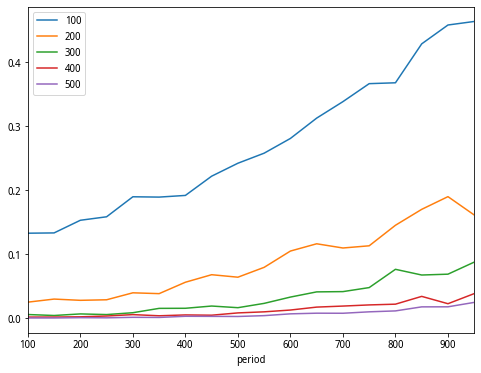

In [19]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('ALOHA').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

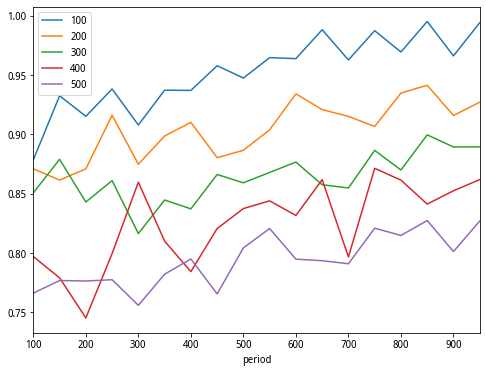

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

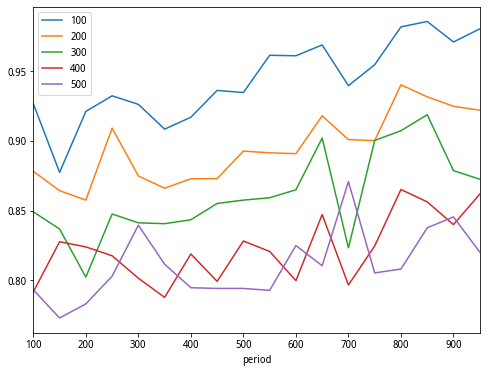

In [21]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

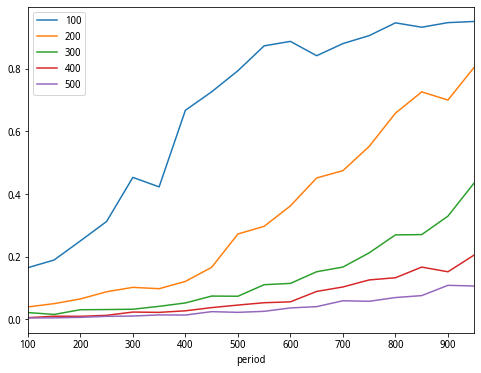

In [22]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

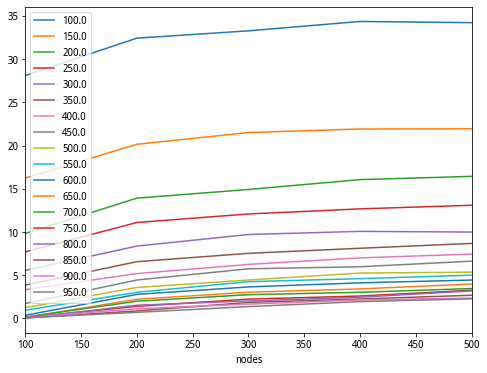

In [23]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('BEH').groupby('period'):
    df.plot(x='nodes',y='c_sensor_buffer_packet_rate', ax=ax, label=label)
plt.legend()

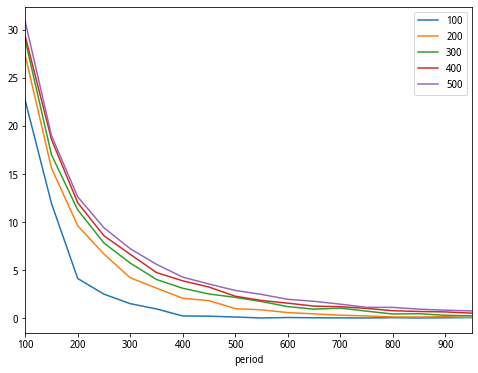

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=label)
plt.legend()

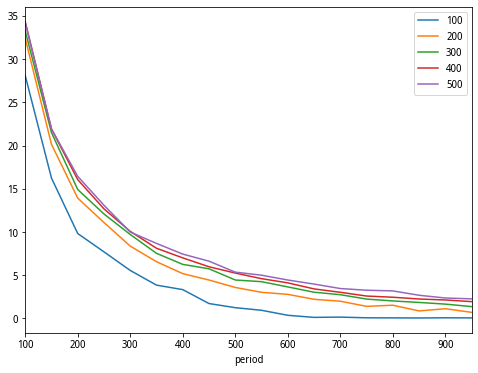

In [25]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=label)
plt.legend()

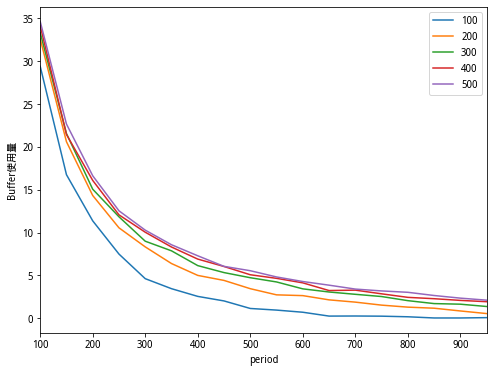

In [26]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('Buffer使用量')

for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=label)
plt.legend()

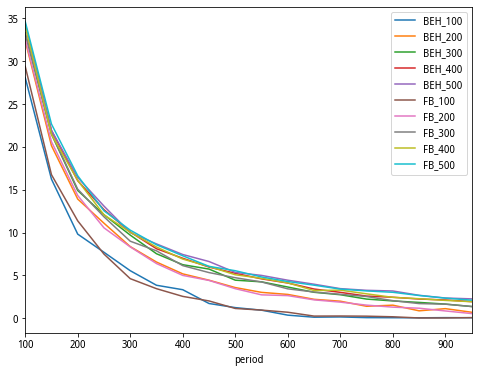

In [27]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='BEH_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='FB_'+str(label))
plt.legend()

# c_sensor_success_packet_rate

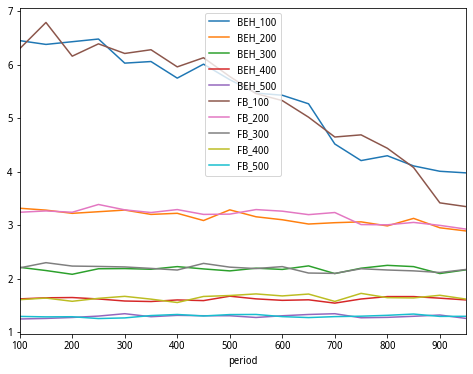

In [28]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_packet_rate', ax=ax, label='BEH_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_packet_rate', ax=ax, label='FB_'+str(label))
plt.legend()

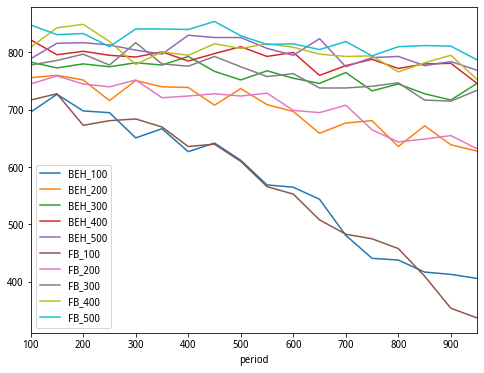

In [29]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label='BEH_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label='FB_'+str(label))
plt.legend()

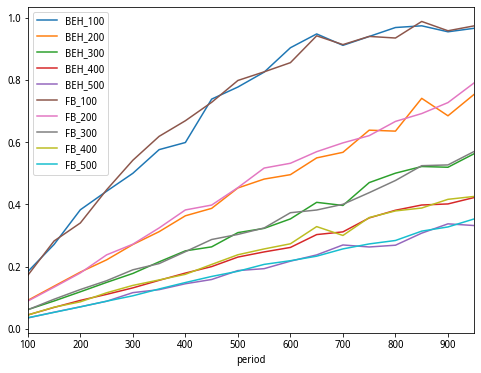

In [30]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('BEH').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='BEH_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='FB_'+str(label))
plt.legend()

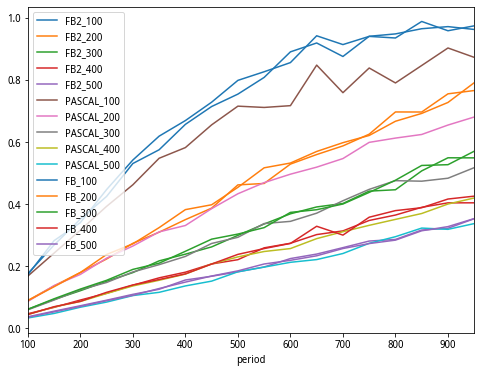

In [31]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('BF2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='FB2_'+str(label))
for label, df in sector.get_group('PASCAL').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='PASCAL_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='FB_'+str(label))
plt.legend()

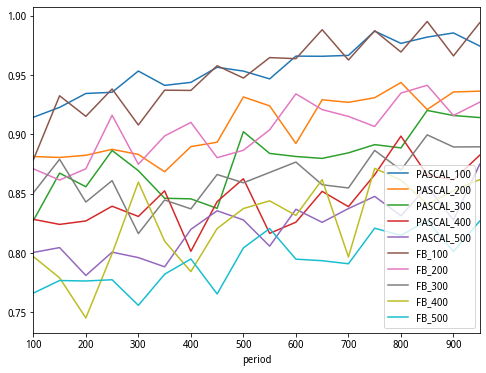

In [32]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
# for label, df in sector.get_group('BF2').groupby('nodes'):
#     df.plot(x='period',y='c_packet_rate', ax=ax, label='FB2_'+str(label))
for label, df in sector.get_group('BF2').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label='PASCAL_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label='FB_'+str(label))
plt.legend()

## 檢測頻道空閒依據比較

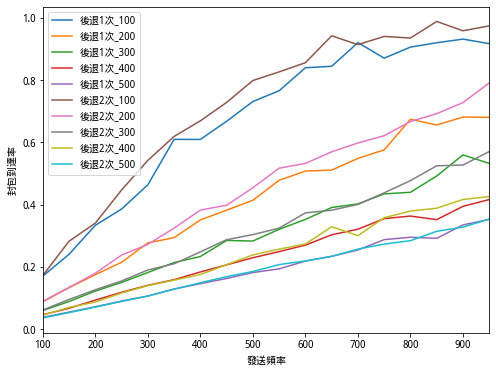

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

for label, df in sector.get_group('cad_success_1').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退1次_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退2次_'+str(label))
# for label, df in sector.get_group('cad_success_3').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))

plt.ylabel('封包到達率')
plt.xlabel('發送頻率')
plt.legend()

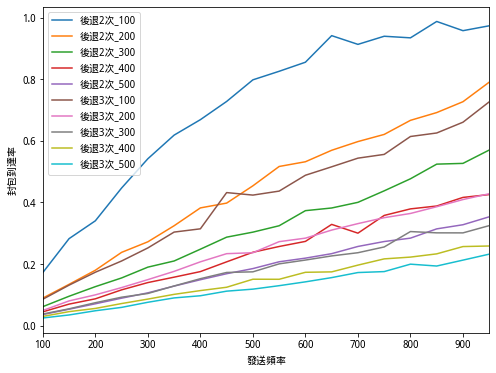

In [55]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退2次_'+str(label))
for label, df in sector.get_group('cad_success_3').groupby('nodes'):
    df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='後退3次_'+str(label))

plt.ylabel('封包到達率')
plt.xlabel('發送頻率')
plt.legend()

## 定量發送

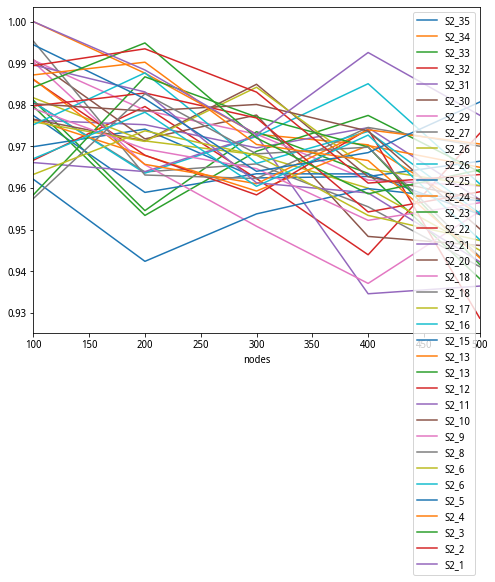

In [34]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for label, df in sector.get_group('limit').groupby('period'):
    df.plot(x='nodes',y='c_packet_rate', ax=ax, label='S2_'+str(int(3600/label)))
plt.legend()

# AGG

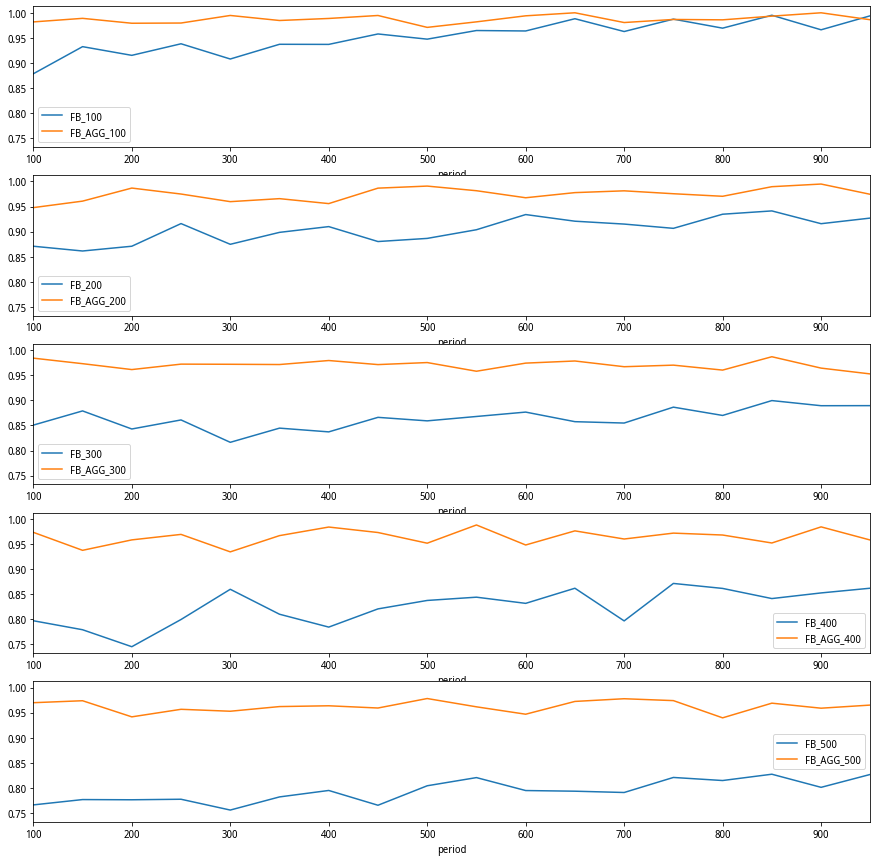

In [35]:
fig, (axs) = plt.subplots(5, 1,figsize=(15,15), sharey=True)

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for index,(bf, agg) in enumerate(zip(sector.get_group('BF').groupby('nodes'), sector.get_group('agg').groupby('nodes'))):
    bf[1].plot(x='period',y='c_packet_rate', ax=axs[index], label='FB_'+str(bf[0]))
    agg[1].plot(x='period',y='c_packet_rate', ax=axs[index], label='FB_AGG_'+str(agg[0]))
plt.legend()

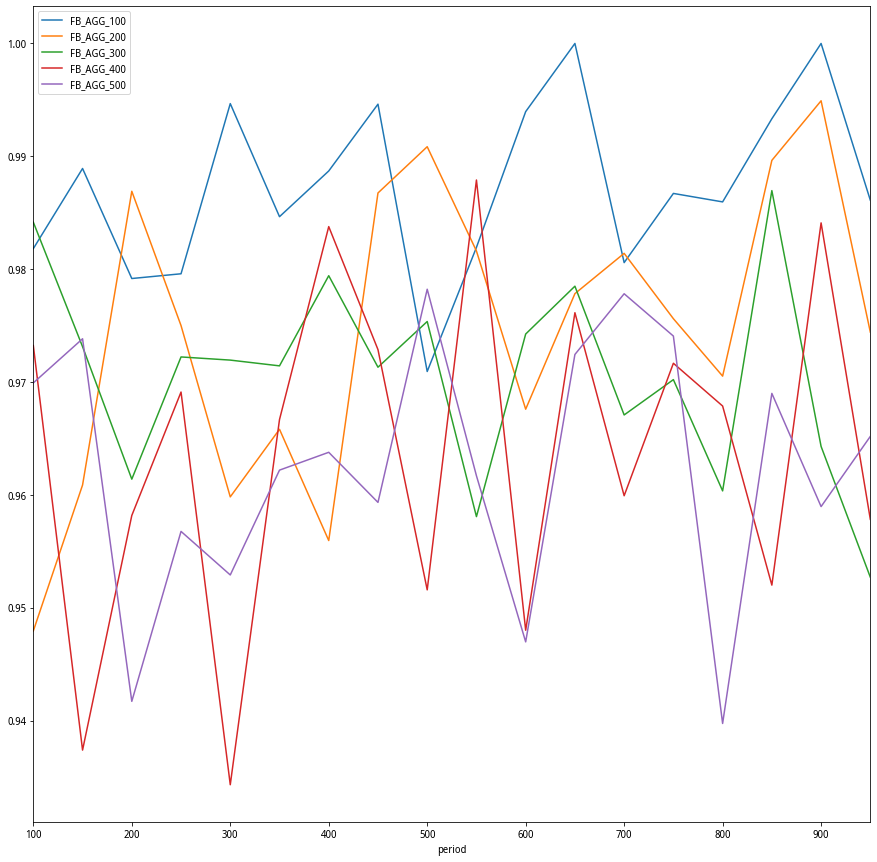

In [36]:
fig, ax = plt.subplots(figsize=(15,15), sharey=True)

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for label, df in sector.get_group('agg').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label='FB_AGG_'+str(label))
plt.legend()

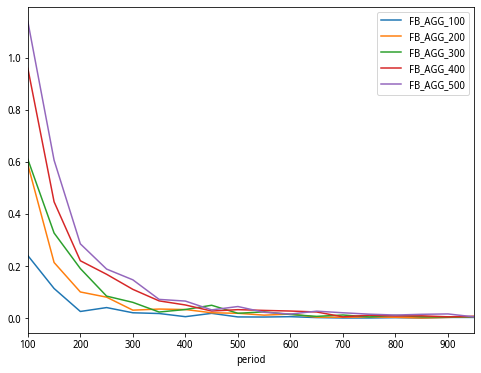

In [37]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
# for label, df in sector.get_group('BF').groupby('nodes'):
#     df.plot(x='period',y='c_packet_rate', ax=ax, label='FB_'+str(label))
    
for label, df in sector.get_group('append').groupby('nodes'):
    df.plot(x='period',y='avg_agg_packets', ax=ax, label='FB_AGG_'+str(label))
plt.legend()

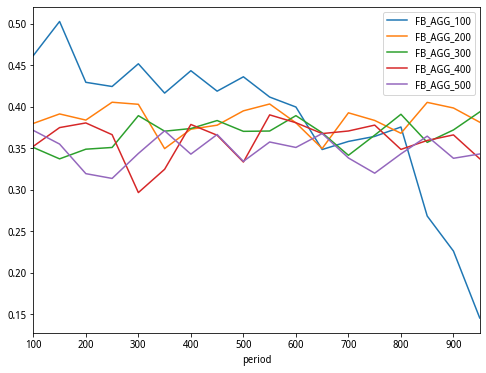

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
bf = sector.get_group('BF') #.groupby('nodes')
bf_agg = sector.get_group('agg') #.groupby('nodes')
data_merge = pd.merge(bf, bf_agg, on=['nodes', 'period'], how='outer')
data_merge['c_sensor_send_success_diff'] = (data_merge['c_sensor_send_success_x'] - data_merge['c_sensor_send_success_y']) / data_merge['c_sensor_send_success_x']

for label, df in data_merge.groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success_diff', ax=ax, label='FB_AGG_'+str(label))
# plt.legend()

# AGG & APPEND

整合、附加次數


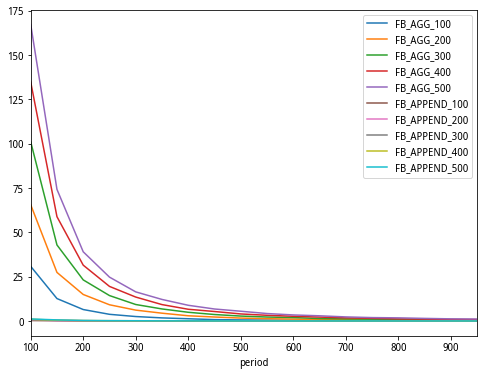

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
# for label, df in sector.get_group('BF').groupby('nodes'):
#     df.plot(x='period',y='c_packet_rate', ax=ax, label='FB_'+str(label))

for label, df in sector.get_group('agg').groupby('nodes'):
    df.plot(x='period',y='avg_agg_packets', ax=ax, label='FB_AGG_'+str(label))

for label, df in sector.get_group('append').groupby('nodes'):
    df.plot(x='period',y='avg_agg_packets', ax=ax, label='FB_APPEND_'+str(label))
plt.legend()

封包到達率

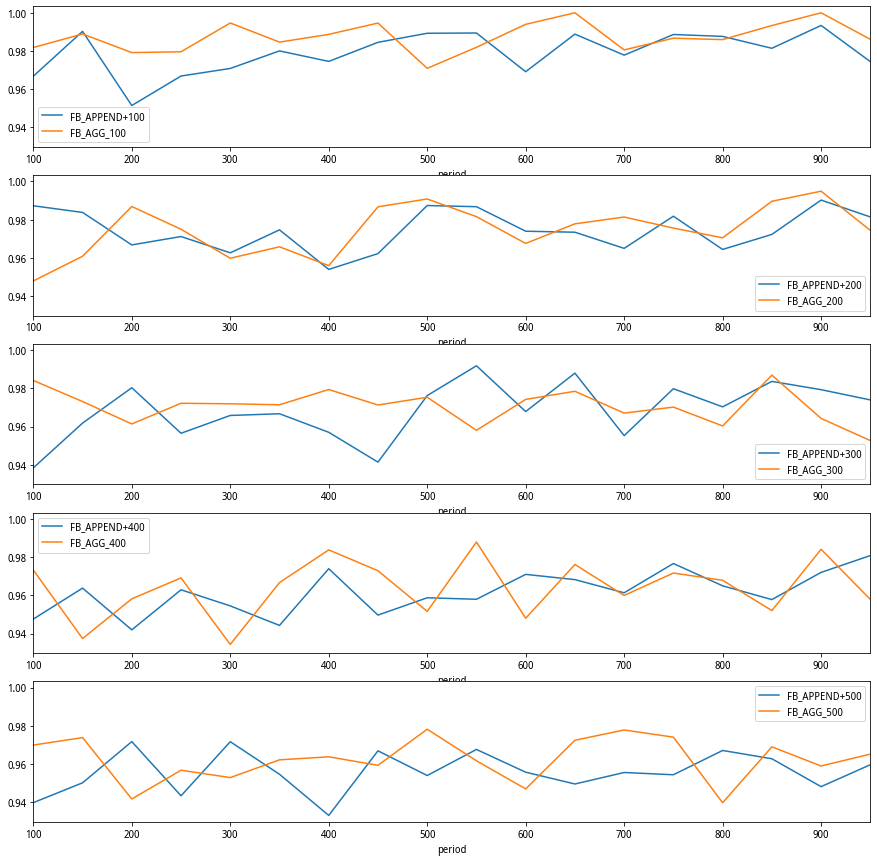

In [40]:
fig, (axs) = plt.subplots(5, 1,figsize=(15,15), sharey=True)

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for index,(append, agg) in enumerate(zip(sector.get_group('append').groupby('nodes'), sector.get_group('agg').groupby('nodes'))):
    append[1].plot(x='period',y='c_packet_rate', ax=axs[index], label='FB_APPEND+'+str(append[0]))
    agg[1].plot(x='period',y='c_packet_rate', ax=axs[index], label='FB_AGG_'+str(agg[0]))
plt.legend()

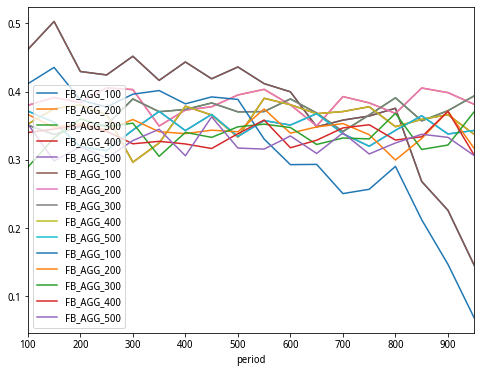

In [41]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
bf = sector.get_group('BF') #.groupby('nodes')
bf_agg = sector.get_group('agg') #.groupby('nodes')
data_merge = pd.merge(bf, bf_agg, on=['nodes', 'period'], how='outer')
data_merge['c_sensor_send_success_diff'] = (data_merge['c_sensor_send_success_x'] - data_merge['c_sensor_send_success_y']) / data_merge['c_sensor_send_success_x']

for label, df in data_merge.groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success_diff', ax=ax, label='FB_AGG_'+str(label))
    
bf_append = sector.get_group('append') #.groupby('nodes')
data_merge2 = pd.merge(bf, bf_append, on=['nodes', 'period'], how='outer')
data_merge2['c_sensor_send_success_diff'] = (data_merge2['c_sensor_send_success_x'] - data_merge2['c_sensor_send_success_y']) / data_merge2['c_sensor_send_success_x']

for label, df in data_merge.groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success_diff', ax=ax, label='FB_AGG_'+str(label))

for label, df in data_merge2.groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success_diff', ax=ax, label='FB_AGG_'+str(label))
# plt.legend()

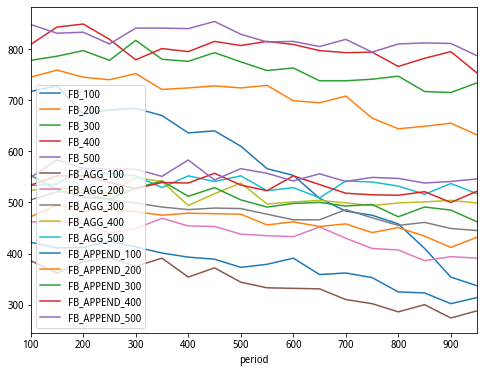

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('cad_success_1').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_success_padding_packet_rate', ax=ax, label='S1_'+str(label))
for label, df in sector.get_group('BF').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label='FB_'+str(label))
    
for label, df in sector.get_group('agg').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label='FB_AGG_'+str(label))

for label, df in sector.get_group('append').groupby('nodes'):
    df.plot(x='period',y='c_sensor_send_success', ax=ax, label='FB_APPEND_'+str(label))
plt.legend()

buffer 使用量

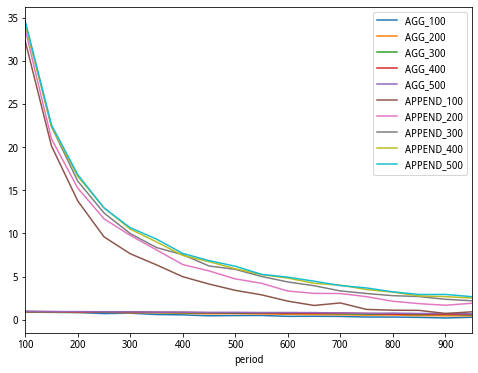

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

# for label, df in sector.get_group('NEW_LORA').groupby('nodes'):
#     df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='LORA_NEW_'+str(label))
for label, df in sector.get_group('agg').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='AGG_'+str(label))
for label, df in sector.get_group('append').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label='APPEND_'+str(label))
plt.legend()

## Append


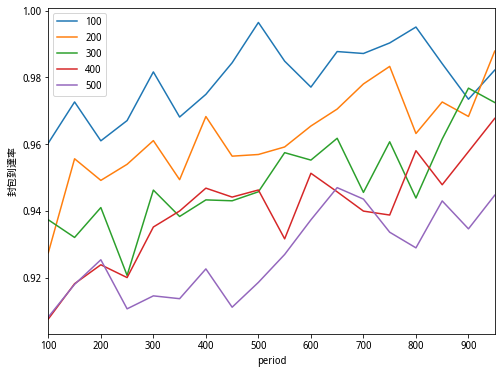

In [50]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('封包到達率')

for label, df in sector.get_group('append2').groupby('nodes'):
    df.plot(x='period',y='c_packet_rate', ax=ax, label=label)
plt.legend()

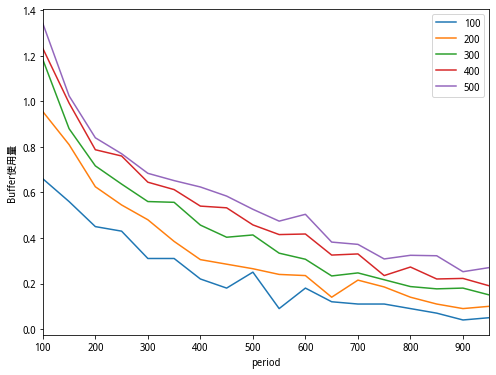

In [44]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('Buffer使用量')

for label, df in sector.get_group('append2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_buffer_packet_rate', ax=ax, label=label)
plt.legend()

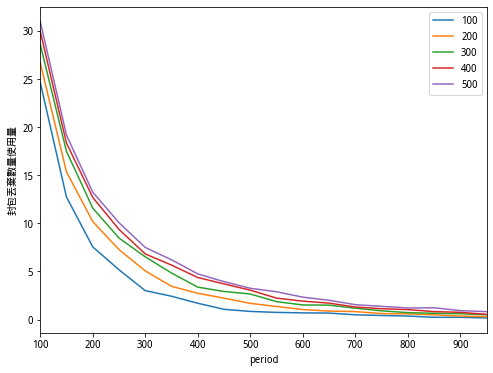

In [48]:
fig, ax = plt.subplots(figsize=(8,6))

plt.ylabel('封包丟棄數量使用量')

for label, df in sector.get_group('append2').groupby('nodes'):
    df.plot(x='period',y='c_sensor_drop_packet_rate', ax=ax, label=label)
plt.legend()